# 1 - Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', 100)

sys.path.append('./../')
import config
from utils import tools
from data_analysis import analysis_plotter, analysis_utils, reporter, dos_plotter
from data_handling import data_processing


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from tabulate import tabulate
from autogluon.tabular import TabularDataset, TabularPredictor
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import time

c:\Users\olaya\anaconda3\envs\superconductor\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Data

In [20]:
MaterialsProcessor = data_processing.DataProcessor(config.PATH_TEST_FIGURES)
materials_data, supercon_data = MaterialsProcessor.processor()
materials_data.head()

2024-07-04 20:51:11: · MODULE: DataProcessor...
2024-07-04 20:51:22:   - 1 rows (0.0017 %) where dropped because of null on ICSD.


bravais_lattice material_name    ICSD  fermi_energy  is_magnetic  \
0             BCC      Ag1F6Sb1   28676      -2.03066        False   
1             BCC      Ag1F6Sb1  411795      -2.03253        False   
2             BCC        Ag1Te3   37186       5.57824        False   
3             BCC     Ag3Au1Se2   15734       2.21332        False   
4             BCC     Ag3Au1Se2  171959       2.22832        False   

   is_superconductor  DOS_m15_00  DOS_m14_98  DOS_m14_97  DOS_m14_95  \
0              False         0.0         0.0         0.0         0.0   
1              False         0.0         0.0         0.0         0.0   
2              False         0.0         0.0         0.0         0.0   
3              False         0.0         0.0         0.0         0.0   
4              False         0.0         0.0         0.0         0.0   

   DOS_m14_94  DOS_m14_92  DOS_m14_91  DOS_m14_89  DOS_m14_88  DOS_m14_86  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_85  DOS_m14_83  DOS_m14_82  DOS_m14_80  DOS_m14_79  DOS_m14_77  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_76  DOS_m14_74  DOS_m14_73  DOS_m14_71  DOS_m14_70  DOS_m14_68  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_67  DOS_m14_65  DOS_m14_64  DOS_m14_62  DOS_m14_61  DOS_m14_59  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_58  DOS_m14_56  DOS_m14_55  DOS_m14_53  DOS_m14_52  DOS_m14_50  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_49  DOS_m14_47  DOS_m14_46  DOS_m14_44  DOS_m14_43  DOS_m14_41  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_40  DOS_m14_38  DOS_m14_37  DOS_m14_35  DOS_m14_34  DOS_m14_32  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0 

In [21]:
supercon_data['ICSD'] = supercon_data['ICSD'].apply(lambda x: int(x.replace('ICSD_', '')))
supercon_data

,chemical_formula,critical_temperature_k,ICSD,synth_doped
0,Ag0.002Al0.998,1.128000,604645,True
1,Ag0.005Zn0.995,0.763000,107744,True
2,Ag0.02Ge2Pd1.98Sr1,2.640000,165985,True
3,Ag0.07Sn0.9Te1,1.730000,19128,True
4,Ag0.153Ba1.99Cu2.847Y1O6.7,86.000000,202498,True
...,...,...,...,...
86485,Zr1,0.996667,76154,False
86486,Zr1,0.996667,43700,False
86487,Zr1,0.996667,164572,False
86488,Zr1,0.996667,253515,False


# 3. Model

In [37]:
path_final = r'.\..\results\patrones' 
data = materials_data.copy()
data.dropna(inplace=True)
data['is_superconductor'] = data['is_superconductor'].astype(bool)

n_PCA = 10
pca_columns = [f'PC{i+1}' for i in range(n_PCA)]
dos_cols = data.loc[:, 'DOS_m15_00':'DOS_p15_00'].columns.tolist()
categorical_cols = ['bravais_lattice']
target_col = ['is_superconductor']
numerical_cols = ['fermi_energy', 'is_magnetic']

X = data.drop(target_col, axis=1)
X = X.fillna(0) 
y = data[target_col]
y = y.iloc[:, 0]

pca = PCA(n_components=n_PCA)
X_pca = pca.fit_transform(X[dos_cols])
X_pca = pd.DataFrame(X_pca, columns=pca_columns)

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = RobustScaler()
X_categorical = categorical_transformer.fit_transform(X[categorical_cols]).toarray()
X_categorical = pd.DataFrame(X_categorical, columns=categorical_transformer.get_feature_names_out(categorical_cols))
X_numerical = numerical_transformer.fit_transform(X[numerical_cols])
X_numerical = pd.DataFrame(X_numerical, columns=numerical_cols)

X = pd.concat([X_categorical, X_numerical, X_pca], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sampling_method = RandomOverSampler()
X_train_sampled, y_train_sampled = sampling_method.fit_resample(X_train, y_train)


################ MODELO 

params = {
    'colsample_bytree': 0.5,
    'gamma': 0.01,
    'learning_rate': 0.22346832437911052,
    'max_depth': 24,
    'n_estimators': 1500,
    'reg_alpha': 0.01,
    'reg_lambda': 0.01,
    'subsample': 0.8240736137234501
}

model = XGBClassifier(**params)
model.fit(X_train, y_train, eval_set=[(X_train_sampled, y_train_sampled), (X_test, y_test)], eval_metric=['error'], early_stopping_rounds=50, verbose=False)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print(f"\nMétricas de rendimiento:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Matriz de confusión:\n{confusion_matrix_result}\n")

c:\Users\olaya\anaconda3\envs\superconductor\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\olaya\anaconda3\envs\superconductor\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Métricas de rendimiento:
Accuracy: 0.9456
Precision: 0.7514
Recall: 0.5223
F1-score: 0.6163
AUC: 0.9375
Matriz de confusión:
[[10863   174]
 [  481   526]]



In [39]:
len(X_test)

12044

In [60]:
X_test_predictions = data.iloc[X_test.index].copy()
X_test_predictions['predicted_superconductor'] = y_pred.astype(bool).copy()
X_test_predictions = pd.merge(X_test_predictions, supercon_data[['ICSD', 'critical_temperature_k', 'synth_doped']], on='ICSD', how='left')
X_test_predictions

bravais_lattice material_name    ICSD  fermi_energy  is_magnetic  \
0                 RHL      Co1O2Pt1   31916      4.508340         True   
1                 ORC      O4Si1Zn2  187839      1.358150        False   
2                 BCT   Fe1O6Re1Sr2  150702      5.250080        False   
3                 FCC         S2Yb1   57493      5.077440        False   
4                 TET   Ge2Mn1O7Sr2  262396      2.138300         True   
...               ...           ...     ...           ...          ...   
14258             RHL      Dy1Li1S2   44958      2.511970        False   
14259             CUB        Pd1Sb2   43102      7.169130        False   
14260             FCC          C1U1  619013     11.103100         True   
14261             TET         As2U1  611529      7.294330         True   
14262             TET        F4N4S4   15422     -0.170284        False   

       is_superconductor  DOS_m15_00  DOS_m14_98  DOS_m14_97  DOS_m14_95  \
0                  False       0.000       0.000       0.000       0.000   
1                  False       0.000       0.000       0.000       0.000   
2                  False       0.000       0.000       0.000       0.000   
3                  False       1.442       1.481       1.528       1.577   
4                  False      11.274      10.926       6.559       2.457   
...                  ...         ...         ...         ...         ...   
14258              False       0.000       0.000       0.000       0.000   
14259               True       0.000       0.000       0.000       0.000   
14260              False       0.000       0.000       0.000       0.000   
14261              False       0.000       0.000       0.000       0.000   
14262              False       0.000       0.000       0.000       0.000   

       DOS_m14_94  DOS_m14_92  DOS_m14_91  DOS_m14_89  DOS_m14_88  DOS_m14_86  \
0           0.000       0.000       0.000        0.00       0.000        0.00   
1           0.000       0.000       0.000        0.00       0.000        0.00   
2           0.000       0.000       0.000        0.00       0.000        0.00   
3           1.628       1.681       1.737        1.79       1.852        1.92   
4           0.000       0.000       0.000        0.00       0.000        0.00   
...           ...         ...         ...         ...         ...         ...   
14258       0.000       0.000       0.000        0.00       0.000        0.00   
14259       0.000       0.000       0.000        0.00       0.000        0.00   
14260       0.000       0.000       0.000        0.00       0.000        0.00   
14261       0.000       0.000       0.000        0.00       0.000        0.00   
14262       0.000       0.000       0.000        0.00       0.000        0.00   

       DOS_m14_85  DOS_m14_83  DOS_m14_82  DOS_m14_80  DOS_m14_79  DOS_m14_77  \
0           0.000       0.000       0.000       0.000       0.000       0.000   
1           0.000       0.000       0.000       0.000       0.000       0.000   
2           0.000       0.000       0.000       0.000       0.000       0.000   
3           1.994       2.076       2.168       2.277       2.426       2.648   
4           0.000       0.000       0.000       0.000       0.000       0.000   
...           ...         ...         ...         ...         ...         ...   
14258       0.000       0.000       0.000       0.000       0.000       0.000   
14259       0.000       0.000       0.000       0.000       0.000       0.000   
14260       0.000       0.000       0.000       0.000       0.000       0.000   
14261       0.000       0.000       0.000       0.000       0.000       0.000   
14262       0.000       0.000       0.000       0.000       0.000       0.000   

       DOS_m14_76  DOS_m14_74  DOS_m14_73  DOS_m14_71  DOS_m14_70  DOS_m14_68  \
0           0.000       0.000       0.000       0.000       0.000       0.000   
1           0.000       0.000       0.000       0.000       0.000       0.000   
2           0.0

In [61]:
X_test_predictions.columns

Index(['bravais_lattice', 'material_name', 'ICSD', 'fermi_energy',
       'is_magnetic', 'is_superconductor', 'DOS_m15_00', 'DOS_m14_98',
       'DOS_m14_97', 'DOS_m14_95',
       ...
       'DOS_p14_91', 'DOS_p14_92', 'DOS_p14_94', 'DOS_p14_95', 'DOS_p14_97',
       'DOS_p14_98', 'DOS_p15_00', 'predicted_superconductor',
       'critical_temperature_k', 'synth_doped'],
      dtype='object', length=2008)

Descripción estadística de los verdaderos positivos:
1655
                ICSD  fermi_energy  critical_temperature_k
count         1655.0   1655.000000             1655.000000
mean   237709.390937      5.731006                7.433518
std    206506.863601      2.115503               10.055003
min           1024.0     -3.517830                0.000000
25%          89142.0      3.893310                0.000000
50%         180476.0      5.243890                4.000000
75%         188783.0      7.099780               12.000000
max         659992.0     13.865400              132.900000

Descripción estadística de los falsos positivos:
1571
                ICSD  fermi_energy  critical_temperature_k
count         1571.0   1571.000000             1571.000000
mean   286756.584341      6.491410               11.089929
std    247512.072572      2.126892               14.101135
min           1089.0     -1.021700                0.000000
25%          94255.0      4.787465                0.281000
50

c:\Users\olaya\anaconda3\envs\superconductor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\olaya\anaconda3\envs\superconductor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


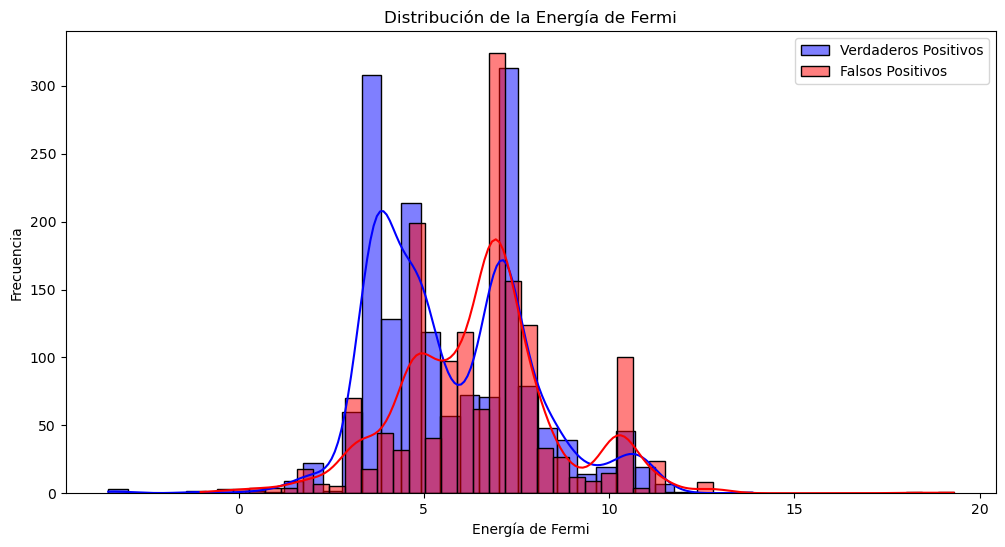

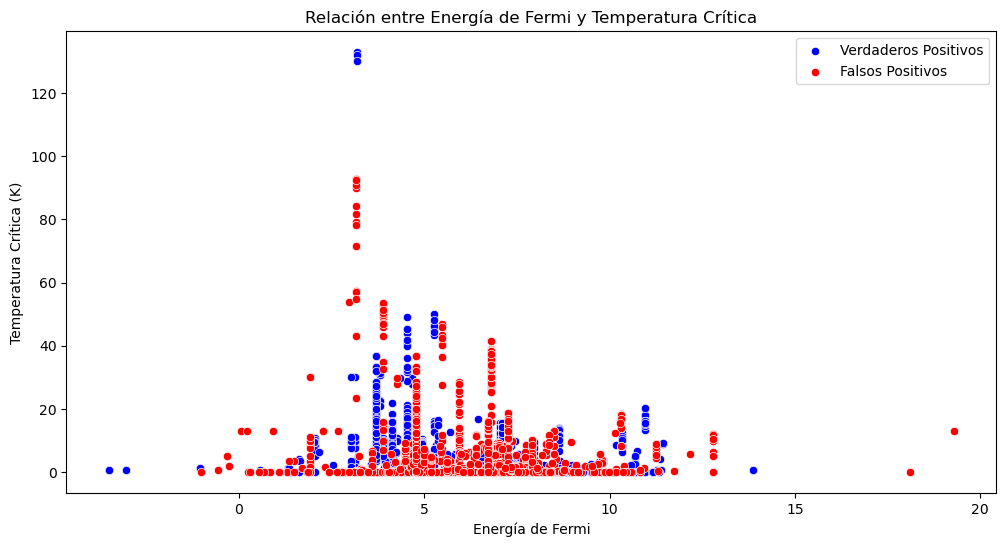

c:\Users\olaya\anaconda3\envs\superconductor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\olaya\anaconda3\envs\superconductor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


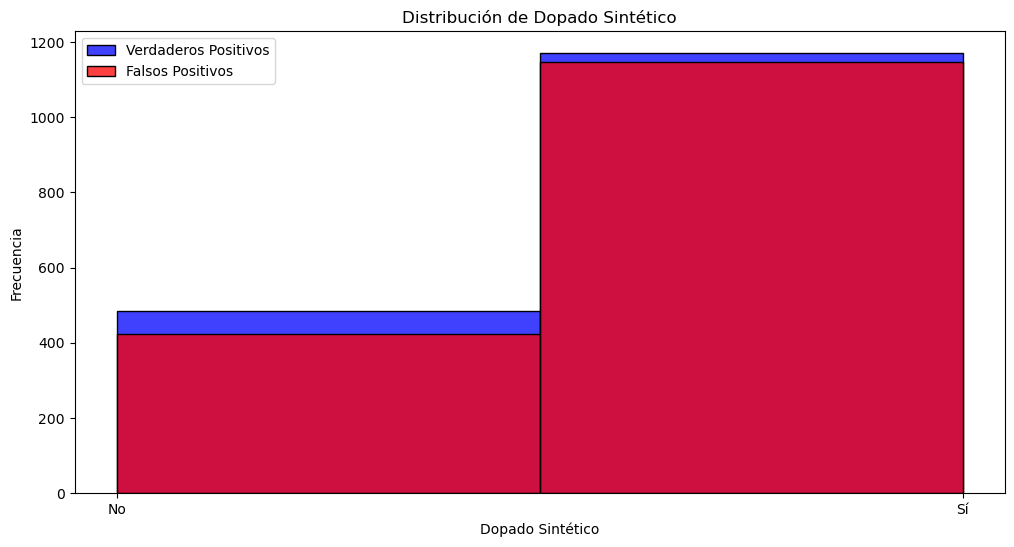

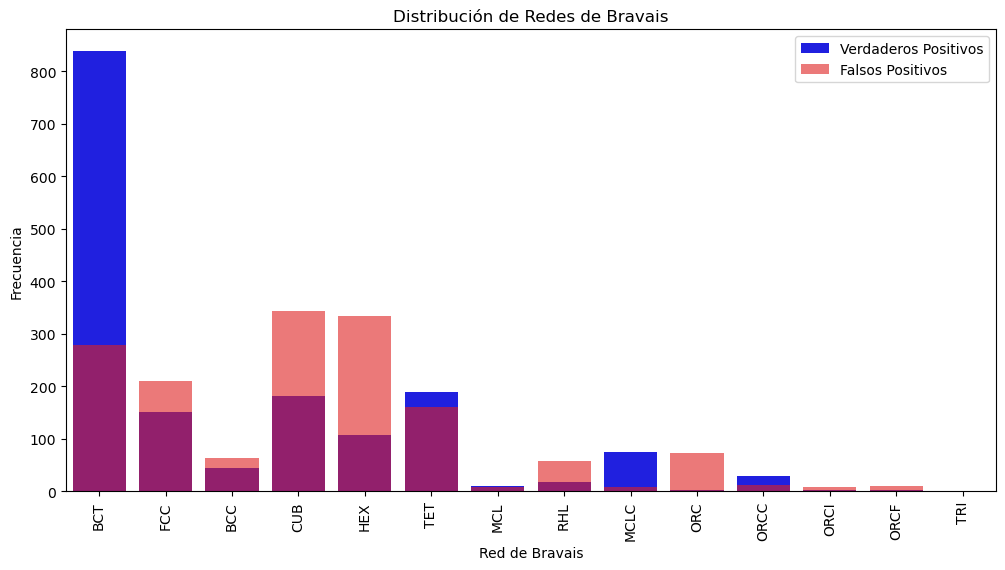

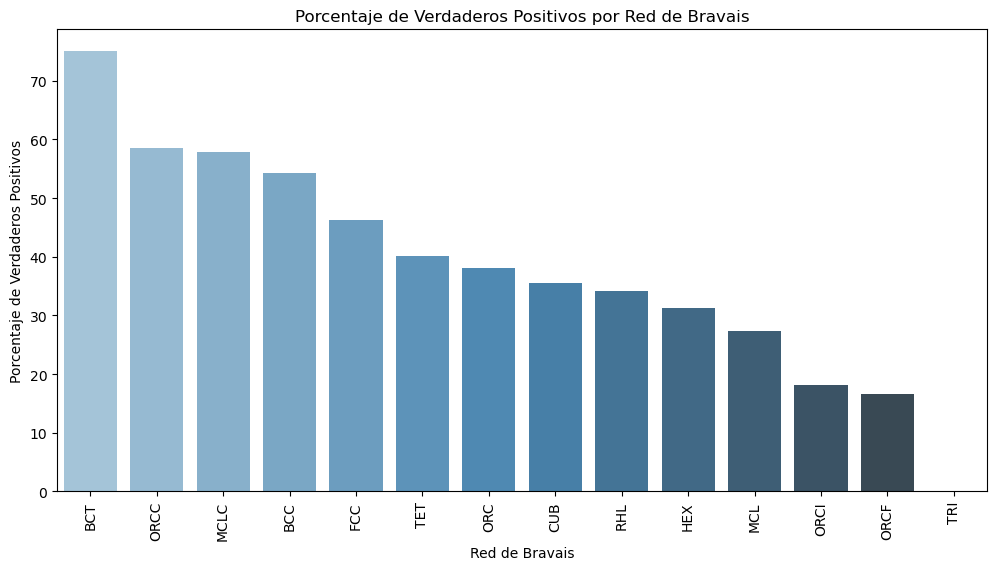

In [62]:
verdaderos_positivos = X_test_predictions[(X_test_predictions['is_superconductor'] == True) & (X_test_predictions['predicted_superconductor'] == True)]
falsos_positivos = X_test_predictions[(X_test_predictions['is_superconductor'] == True) & (X_test_predictions['predicted_superconductor'] == False)]

desc_verdaderos_positivos = verdaderos_positivos[['bravais_lattice', 'material_name', 'ICSD', 'fermi_energy', 'is_magnetic', 'is_superconductor', 
                                                 'predicted_superconductor', 'critical_temperature_k', 'synth_doped']].describe()
desc_falsos_positivos = falsos_positivos[['bravais_lattice', 'material_name', 'ICSD', 'fermi_energy', 'is_magnetic', 'is_superconductor', 
                                       'predicted_superconductor', 'critical_temperature_k', 'synth_doped']].describe()

# Mostrar descripción estadística
print("Descripción estadística de los verdaderos positivos:")
print(f"{len(verdaderos_positivos)}")
print(desc_verdaderos_positivos)
print("\nDescripción estadística de los falsos positivos:")
print(f"{len(falsos_positivos)}")
print(desc_falsos_positivos)

# Visualizar la distribución de la energía de Fermi
plt.figure(figsize=(12, 6))
sns.histplot(verdaderos_positivos['fermi_energy'], kde=True, color='blue', label='Verdaderos Positivos')
sns.histplot(falsos_positivos['fermi_energy'], kde=True, color='red', label='Falsos Positivos')
plt.legend()
plt.title('Distribución de la Energía de Fermi')
plt.xlabel('Energía de Fermi')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la relación entre critical_temperature_k y fermi_energy
plt.figure(figsize=(12, 6))
sns.scatterplot(data=verdaderos_positivos, x='fermi_energy', y='critical_temperature_k', color='blue', label='Verdaderos Positivos')
sns.scatterplot(data=falsos_positivos, x='fermi_energy', y='critical_temperature_k', color='red', label='Falsos Positivos')
plt.legend()
plt.title('Relación entre Energía de Fermi y Temperatura Crítica')
plt.xlabel('Energía de Fermi')
plt.ylabel('Temperatura Crítica (K)')
plt.show()

# Visualizar si están dopados sintéticamente
plt.figure(figsize=(12, 6))
sns.histplot(verdaderos_positivos['synth_doped'].astype(int), kde=False, color='blue', label='Verdaderos Positivos', bins=2)
sns.histplot(falsos_positivos['synth_doped'].astype(int), kde=False, color='red', label='Falsos Positivos', bins=2)
plt.legend()
plt.title('Distribución de Dopado Sintético')
plt.xlabel('Dopado Sintético')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

# Visualizar las redes de Bravais
plt.figure(figsize=(12, 6))
sns.countplot(data=verdaderos_positivos, x='bravais_lattice', color='blue', label='Verdaderos Positivos')
sns.countplot(data=falsos_positivos, x='bravais_lattice', color='red', label='Falsos Positivos', alpha=0.6)
plt.legend()
plt.title('Distribución de Redes de Bravais')
plt.xlabel('Red de Bravais')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

# Calcular el porcentaje de verdaderos positivos para cada red de Bravais
total_por_bravais = X_test_predictions[X_test_predictions['is_superconductor'] == True]['bravais_lattice'].value_counts()
verdaderos_por_bravais = verdaderos_positivos['bravais_lattice'].value_counts()

porcentaje_verdaderos_positivos = (verdaderos_por_bravais / total_por_bravais) * 100

# Crear un DataFrame para facilitar la visualización
df_porcentaje = pd.DataFrame({
    'bravais_lattice': porcentaje_verdaderos_positivos.index,
    'porcentaje_verdaderos_positivos': porcentaje_verdaderos_positivos.values
}).sort_values(by='porcentaje_verdaderos_positivos', ascending=False)

# Visualizar el porcentaje de verdaderos positivos por red de Bravais
plt.figure(figsize=(12, 6))
sns.barplot(data=df_porcentaje, x='bravais_lattice', y='porcentaje_verdaderos_positivos', palette='Blues_d')
plt.title('Porcentaje de Verdaderos Positivos por Red de Bravais')
plt.xlabel('Red de Bravais')
plt.ylabel('Porcentaje de Verdaderos Positivos')
plt.xticks(rotation=90)
plt.show()

In [43]:
X_reducted = X_test_predicitons[['bravais_lattice', 'material_name', 'ICSD', 'fermi_energy', 'is_magnetic', 'critical_temperature_k', 'synth_doped', 'is_superconductor', 'predicted_superconductor']].copy()

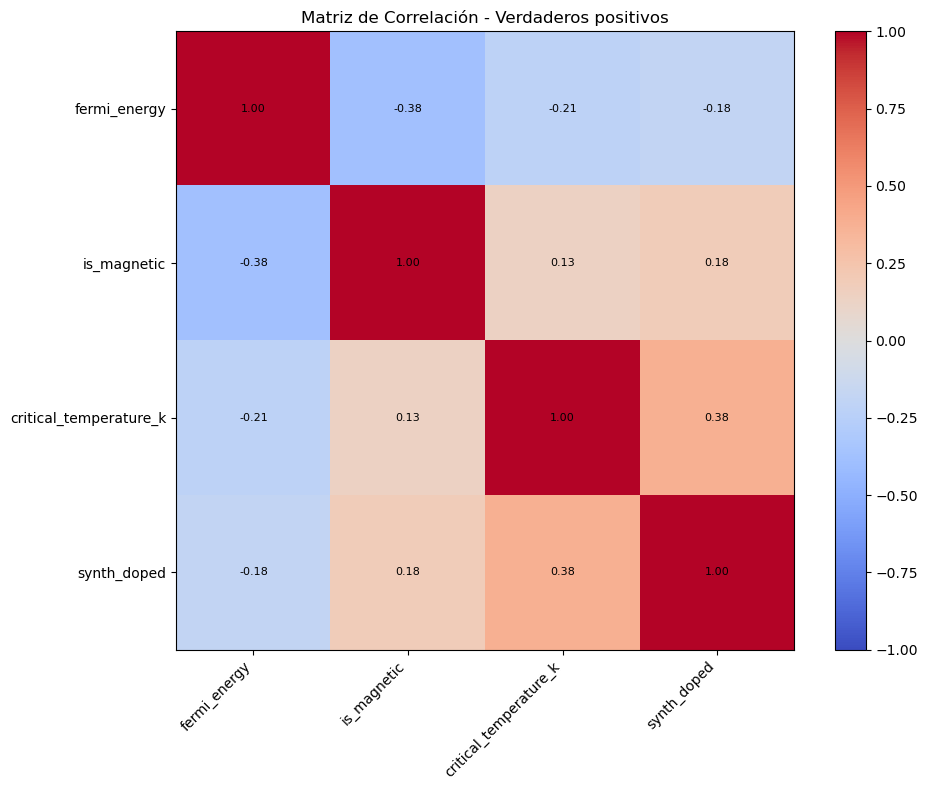

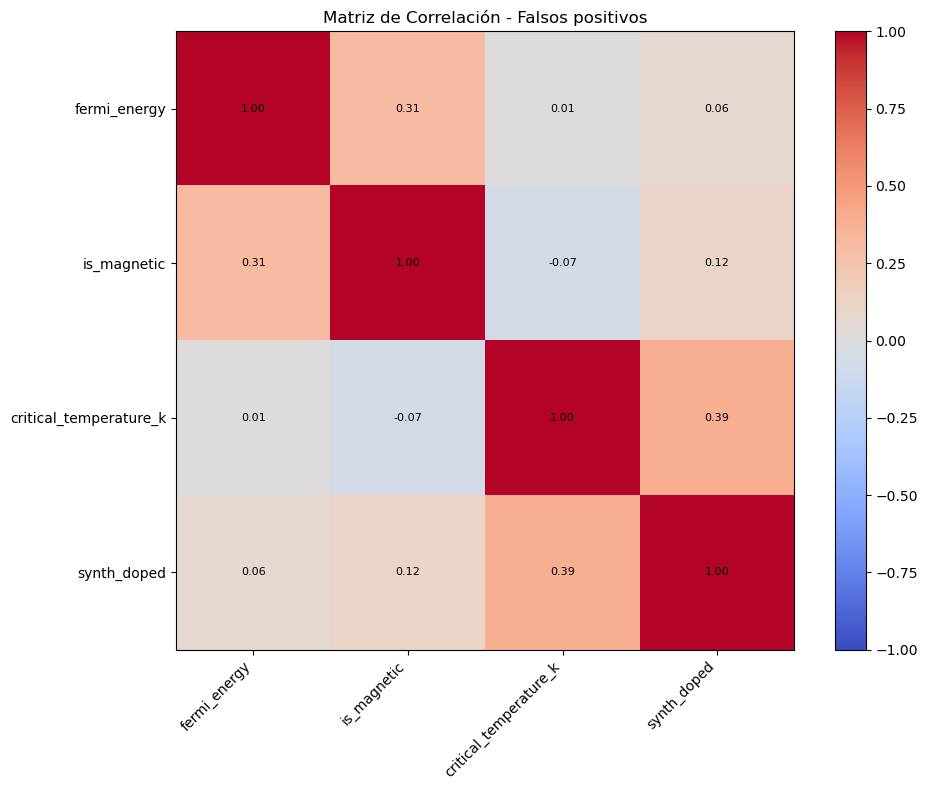

In [50]:
correlation_matrix = X_reducted[(X_test_predicitons['is_superconductor'] == True) & (X_test_predicitons['predicted_superconductor'] == True)][['fermi_energy', 'is_magnetic', 'critical_temperature_k', 'synth_doped']].corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)

cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(correlation_matrix.columns)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black", size=8)

ax.set_title('Matriz de Correlación - Verdaderos positivos')
fig.tight_layout()
plt.show()


correlation_matrix = X_reducted[(X_test_predicitons['is_superconductor'] == True) & (X_test_predicitons['predicted_superconductor'] == False)][['fermi_energy', 'is_magnetic', 'critical_temperature_k', 'synth_doped']].corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)

cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(correlation_matrix.columns)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black", size=8)

ax.set_title('Matriz de Correlación - Falsos positivos')
fig.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


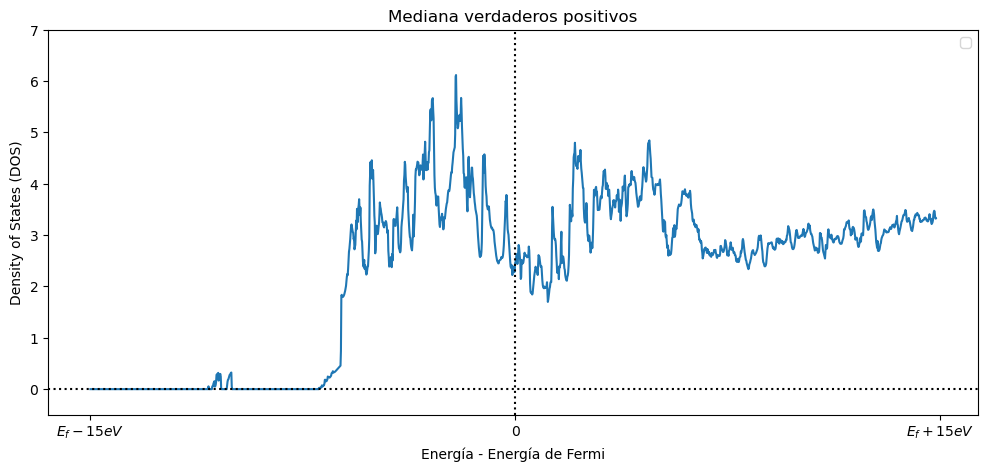

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


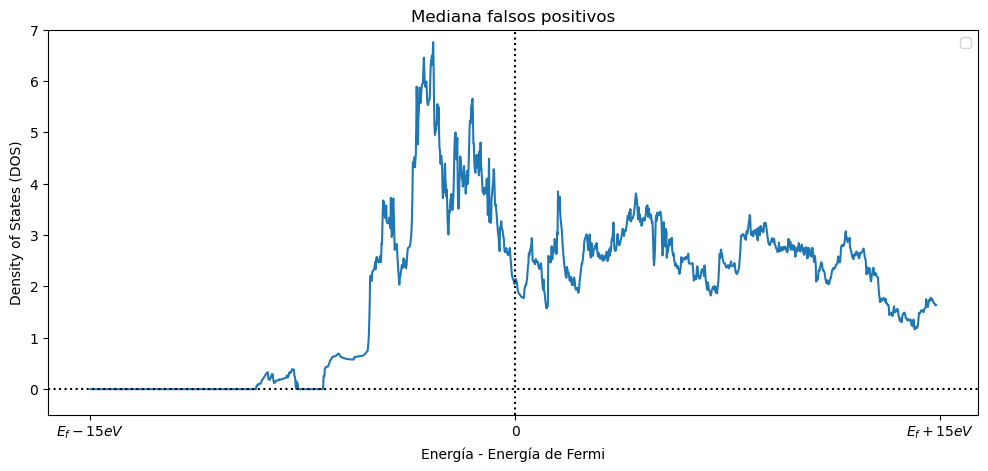

In [57]:
def plot_median_dos_by_bravais(data_materials, title):
    """
    Plots average DOS curves for each Bravais lattice group.
    """
    data_plot = data_materials.copy()

    plt.figure(figsize=(12,5))

    average_dos = data_plot.loc[:, 'DOS_m15_00':'DOS_p15_00'].median(axis=0)  
    plt.plot(average_dos)

    num_cols = len(data_materials.columns)
    center_index = num_cols // 2 

    plt.axhline(y=0, color='black', linestyle=':')
    plt.axvline(x=center_index, color='black', linestyle=':') 
    plt.xticks([0, center_index, num_cols - 1], labels=['$E_f-15eV$', '0', '$E_f+15eV$'])
    plt.ylabel("Density of States (DOS)")
    plt.xlabel("Energía - Energía de Fermi")
    plt.title(f"{title}")
    
    plt.grid(False)
    plt.legend()
    
    plt.ylim(-0.5,7)

    plt.show()

plot_median_dos_by_bravais(verdaderos_positivos, title='Mediana verdaderos positivos')
plot_median_dos_by_bravais(falsos_positivos, title='Mediana falsos positivos')